# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [2]:
# Import your libraries
import pandas as pd
import numpy as np
import requests
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [6]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [7]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

### Preprocesado de los datos

In [8]:
# Definir la X, variables predictoras
X = train_dataset.drop(["10"], axis=1)
# Definir la variable dependiente
y = train_dataset[["10"]].rename(columns={"10": "autor"})
# Valores únicos
y["autor"].unique()
# Asignar un número de clase a los autores, por si el clasificador no admite nombres
y.loc[(y.autor == 'Marcus'),'class']='1'
y.loc[(y.autor == 'Clarius'),'class']='2'
y.loc[(y.autor == 'Philippus'),'class']='3'
y.loc[(y.autor == 'Coronavirucus'),'class']='4'
y.loc[(y.autor == 'Mongucus'),'class']='5'
y.loc[(y.autor == 'Paithonius'),'class']='6'
y.loc[(y.autor == 'Ubuntius'),'class']='7'
y.loc[(y.autor == 'Esequlius'),'class']='8'

#### Comprobar si hay datos nulos

In [9]:
X.isna().sum().sort_values(ascending=False)

9    0
8    0
7    0
6    0
5    0
4    0
3    0
2    0
1    0
0    0
dtype: int64

#### Frecuencia de cada autor en los datos de entrenamiento

In [31]:
y['autor'].value_counts()

Marcus           5107
Clarius          2362
Philippus        1360
Coronavirucus    1009
Mongucus          640
Paithonius        600
Ubuntius          512
Esequlius         427
Name: autor, dtype: int64

#### Estadística básica en busca de outliers

In [10]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


#### Filtrado de outliers

In [11]:
X_cl = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
#X_cl.describe()
# Actualizar la y con las filan que quedan tras la limpieza
y_cl = y[y.index.isin(X_cl.index)]

#### Reducción de variables mediante PCA (por probar)

In [12]:
from sklearn.decomposition import PCA
# Definir la PCA
pca = PCA(n_components=2)
# Ajustar a los datos en bruto
X_pca = pca.fit_transform(X)
# Convertir a dataframe
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
# Añadir las equiquetas
PCA_df = pd.concat([PCA_df, y['autor']], axis = 1)

# Ajustar a los datos sin outliers
X_pcacl = pca.fit_transform(X_cl)
# Convertir a dataframe
PCA_dfcl = pd.DataFrame(data = X_pcacl, columns = ['PC1', 'PC2'])
# Añadir las etiquetas
PCA_dfcl = pd.concat([PCA_dfcl, y_cl['autor']], axis = 1)

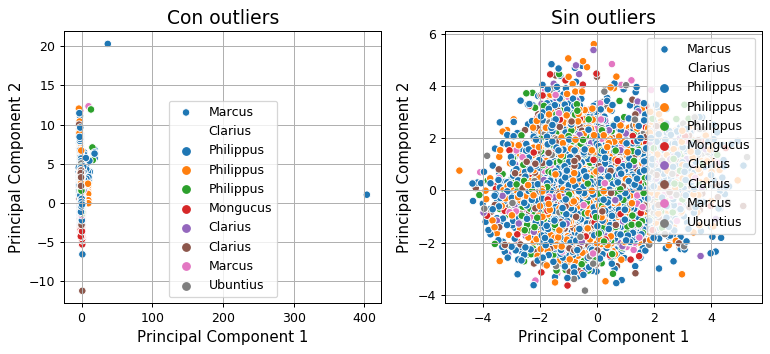

In [13]:
fig,axes = plt.subplots(figsize = (10,4),nrows = 1, ncols = 2, dpi=90)
plt.sca(axes[0])
sns.scatterplot(PCA_df.PC1, PCA_df.PC2, hue = PCA_df["autor"])    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Con outliers', fontsize = 15)
plt.legend(PCA_df["autor"])
plt.grid()
plt.sca(axes[1])
sns.scatterplot(PCA_dfcl.PC1, PCA_dfcl.PC2, hue = PCA_dfcl["autor"])    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Sin outliers', fontsize = 15)
plt.legend(PCA_df["autor"])
plt.grid()

**EN DATOS CON TAN POCAS VARIABLES, LA PCA NO SIRVE PARA NADA. LA PONGO PARA ILUSTRAR Y DARLE VIDILLA.**

### Modelos

#### Dividir las muestras de entrenamiento y validación

In [14]:
# Para datos en bruto
X_train, X_test, y_train, y_test = train_test_split(X, y["autor"], test_size=0.25)

# Para datos sin outliers
X_traincl, X_testcl, y_traincl, y_testcl = train_test_split(X_cl, y_cl["autor"], test_size=0.25)

#### Regresión Logística 

* Datos en bruto. Solver: `saga`

In [15]:
# Definir y aplicar el modelo
model_bruto_saga =  LogisticRegression(solver="saga").fit(X_train, y_train)
# Hacer la predicción
y_test_pred = model_bruto_saga.predict(X_test)

#comparison = pd.DataFrame({"y_test_pred":y_test_pred,"gt":y_test})
#comparison

print(classification_report(y_test_pred,y_test))

               precision    recall  f1-score   support

      Clarius       0.01      0.09      0.02        79
Coronavirucus       0.84      0.77      0.80       267
    Esequlius       0.00      0.00      0.00         0
       Marcus       0.97      0.50      0.66      2529
     Mongucus       0.61      0.98      0.75       104
   Paithonius       0.00      0.00      0.00         0
    Philippus       0.02      0.27      0.04        26
     Ubuntius       0.00      0.00      0.00         0

     accuracy                           0.53      3005
    macro avg       0.31      0.33      0.28      3005
 weighted avg       0.91      0.53      0.65      3005



/home/lee/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/lee/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Datos en bruto. Solver: `newton-cg`

In [16]:
# Definir y aplicar el modelo
model_bruto_newton =  LogisticRegression(solver="newton-cg").fit(X_train, y_train)
# Hacer la predicción
y_test_pred = model_bruto_newton.predict(X_test)

print(classification_report(y_test_pred,y_test))


               precision    recall  f1-score   support

      Clarius       0.09      0.38      0.15       146
Coronavirucus       0.87      0.87      0.87       247
    Esequlius       0.00      0.00      0.00         0
       Marcus       0.94      0.55      0.69      2229
     Mongucus       0.77      0.78      0.77       164
   Paithonius       0.14      0.42      0.21        52
    Philippus       0.25      0.49      0.33       167
     Ubuntius       0.00      0.00      0.00         0

     accuracy                           0.57      3005
    macro avg       0.38      0.43      0.38      3005
 weighted avg       0.83      0.57      0.66      3005



/home/lee/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Datos sin outliers. Solver: `saga`

In [18]:
# Definir y aplicar el modelo
model_out_saga =  LogisticRegression(solver='saga').fit(X_traincl, y_traincl)
# Hacer la predicción
y_test_pred = model_out_saga.predict(X_testcl)

#comparison = pd.DataFrame({"y_test_pred":y_test_pred,"gt":y_test})
#comparison

print(classification_report(y_test_pred,y_testcl))

               precision    recall  f1-score   support

      Clarius       0.20      0.44      0.28       279
Coronavirucus       0.97      1.00      0.98       220
    Esequlius       0.03      0.18      0.05        17
       Marcus       0.89      0.60      0.72      1674
     Mongucus       0.86      0.87      0.86       142
   Paithonius       0.24      0.54      0.33        63
    Philippus       0.74      0.59      0.66       379
     Ubuntius       0.02      0.27      0.04        11

     accuracy                           0.62      2785
    macro avg       0.49      0.56      0.49      2785
 weighted avg       0.78      0.62      0.68      2785



* Datos sin outliers. Solver: `newton-cg`

In [19]:
# Definir y aplicar el modelo
model_out_newton =  LogisticRegression(solver='newton-cg').fit(X_traincl, y_traincl)
# Hacer la predicción
y_test_pred = model_out_newton.predict(X_testcl)

print(classification_report(y_test_pred,y_testcl))

               precision    recall  f1-score   support

      Clarius       0.20      0.44      0.28       279
Coronavirucus       0.97      1.00      0.98       220
    Esequlius       0.03      0.18      0.05        17
       Marcus       0.89      0.60      0.72      1674
     Mongucus       0.86      0.87      0.86       142
   Paithonius       0.24      0.54      0.33        63
    Philippus       0.74      0.59      0.66       379
     Ubuntius       0.02      0.27      0.04        11

     accuracy                           0.62      2785
    macro avg       0.49      0.56      0.49      2785
 weighted avg       0.78      0.62      0.68      2785



OBSERVACIÓN: Funciona mejor con outliers.

#### Support Vector Classification 

* Datos en bruto. Como hay clases que tienen muy poca frecuencia, he optado por meter la ponderación

In [20]:
# Definir y aplicar el modelo
model_svc_bruto = SVC(kernel='linear', class_weight= 'balanced').fit(X_train, y_train)
# Hacer la predicción
y_test_pred = model_svc_bruto.predict(X_test)

print(classification_report(y_test_pred,y_test))

               precision    recall  f1-score   support

      Clarius       0.50      0.45      0.47       656
Coronavirucus       0.88      0.83      0.85       261
    Esequlius       0.51      0.16      0.24       330
       Marcus       0.46      0.80      0.58       750
     Mongucus       0.81      0.65      0.72       208
   Paithonius       0.67      0.37      0.47       281
    Philippus       0.33      0.48      0.39       222
     Ubuntius       0.69      0.32      0.44       297

     accuracy                           0.53      3005
    macro avg       0.61      0.50      0.52      3005
 weighted avg       0.57      0.53      0.52      3005



In [27]:
# Definir y aplicar el modelo sin ponderar
model_svc_bruto = SVC(kernel='linear').fit(X_train, y_train)
# Hacer la predicción
y_test_pred = model_svc_bruto.predict(X_test)

print(classification_report(y_test_pred,y_test))

               precision    recall  f1-score   support

      Clarius       0.00      0.40      0.01         5
Coronavirucus       0.89      0.88      0.88       248
    Esequlius       0.00      0.00      0.00         0
       Marcus       0.98      0.53      0.69      2427
     Mongucus       0.75      0.87      0.80       144
   Paithonius       0.03      0.42      0.06        12
    Philippus       0.33      0.63      0.43       169
     Ubuntius       0.00      0.00      0.00         0

     accuracy                           0.58      3005
    macro avg       0.37      0.46      0.36      3005
 weighted avg       0.92      0.58      0.69      3005



/home/lee/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Classifer

In [56]:
model_gbc_bruto = GradientBoostingClassifier(criterion= 'friedman_mse', init=None,
 learning_rate=0.1, loss='deviance', max_depth=3,
 max_features= None, max_leaf_nodes= 120 , min_samples_leaf= 50,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=32,  random_state=None, subsample=0.8, verbose=0, warm_start=False).fit(X_train, y_train)
# Hacer la predicción
y_test_pred = model_gbc_bruto.predict(X_test)

In [57]:
print(classification_report(y_test_pred,y_test))

               precision    recall  f1-score   support

      Clarius       0.56      0.81      0.67       403
Coronavirucus       0.98      1.00      0.99       241
    Esequlius       0.90      0.90      0.90       101
       Marcus       0.92      0.77      0.84      1549
     Mongucus       0.88      0.95      0.92       154
   Paithonius       0.69      0.85      0.76       125
    Philippus       0.81      0.82      0.81       322
     Ubuntius       0.67      0.84      0.74       110

     accuracy                           0.82      3005
    macro avg       0.80      0.87      0.83      3005
 weighted avg       0.85      0.82      0.83      3005



Ouh mamma, o he dado con la tecla o hay overfitting. Parece que al bajar el número de estimadores a 32, los resultados son más creíbles.

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

#### Regresión logística. solve = 'saga'. Datos brutos

In [26]:
# Correr el modelo con todos los datos. 
# He subido el número de max_iter 
model_bruto_saga =  LogisticRegression(solver="saga", max_iter= 5000).fit(X, y['autor']) 

# Hacer la predicción con el test set
y_pred_bruto_saga = model_bruto_saga.predict(test_dataset)

# Guardar la predicción
sub_bruto_saga = pd.DataFrame(y_pred_bruto_saga).to_csv(header=None)

#### Regresión logística. solve = 'newton-cg'. Datos brutos

In [61]:
# Correr el modelo con todos los datos. 
# He subido el número de max_iter 
model_bruto_newton =  LogisticRegression(solver="newton-cg", max_iter= 5000).fit(X, y['autor']) 

# Hacer la predicción con el test set
y_pred_bruto_newton = model_bruto_newton.predict(test_dataset)

# Guardar la predicción
sub_bruto_newton = pd.DataFrame(y_pred_bruto_newton).to_csv(header=None)

#### SVC. Ponderados. Datos brutos

In [28]:
# Correr el modelo con todos los datos
model_svc_bruto = SVC(kernel='linear', class_weight= 'balanced').fit(X, y['autor'])
# Hacer la predicción
y_pred_todo = model_svc_bruto.predict(test_dataset)
sub_svc_bruto = pd.DataFrame(y_pred_todo).to_csv(header=None)

#### Gradient Boosting Classifer. n_estimators = 32. Datos brutos


In [58]:
model_gbc_bruto = GradientBoostingClassifier(criterion= 'friedman_mse', init=None,
 learning_rate=0.1, loss='deviance', max_depth=3,
 max_features= None, max_leaf_nodes= 120 , min_samples_leaf= 50,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=32,  random_state=None, subsample=0.8, verbose=0, warm_start=False).fit(X, y['autor'])
# Hacer la predicción
y_pred_todo = model_gbc_bruto.predict(test_dataset)
sub_gbcbruto = pd.DataFrame(y_pred_todo).to_csv(header=None)

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [62]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":sub_bruto_newton })
res.json()

{'accuracy': 0.5750124812780829,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

In [3]:
# Almacenar los resultados 
resultados = [
    {"modelo": "LogisticRegression(solver='newton-cg')",
     "datos": "brutos",
    "accuracy": 0.5750 },
    {"modelo": "LogisticRegression(solver='saga')",
     "datos": "brutos",
    "accuracy": 0.5750 },
    {"modelo": "SVC(kernel= 'lineal', class_weight= 'balanced')",
     "datos": "brutos",
    "accuracy": 0.5374 },
    {"modelo": "GBC(n_estimators= 32)",
     "datos": "brutos",
    "accuracy":0.8085 }
    ]

# Convertir a dataframe
df = pd.DataFrame(resultados)
df

,modelo,datos,accuracy
0,LogisticRegression(solver='newton-cg'),brutos,0.5750
1,LogisticRegression(solver='saga'),brutos,0.5750
2,"SVC(kernel= 'lineal', class_weight= 'balanced')",brutos,0.5374
3,GBC(n_estimators= 32),brutos,0.8085


![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)